<a href="https://colab.research.google.com/github/Bassendiaye/lowdiscovery/blob/main/projetdataminingtpog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet Data Mining : analyse et classification d’articles de presse

## 0. Importation des données

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
articles = pd.read_csv('articles_projet.csv')

In [ ]:
articles['thematiqueArticle'].unique()

array(['Politique', 'Justice', 'Sante', 'Sport', 'Economie', 'Education'],
      dtype=object)

Suppression des lignes contenant pour thematique : Justice, Sport, Economie

In [ ]:
articles = articles[~articles['thematiqueArticle'].isin(['Justice', 'Sport', 'Economie'])]


## 1. Analyse exploratoire des données

Importation des bibliothèques et configuration

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

pd.options.plotting.backend = "plotly"

In [ ]:
from nltk.corpus import stopwords
import nltk

### 1.1. Description globale du dataset

Informations sur le dataset

In [ ]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5328 entries, 0 to 7837
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   identifiantArticle  5328 non-null   object
 1   contenuArticle      5313 non-null   object
 2   thematiqueArticle   5328 non-null   object
dtypes: object(3)
memory usage: 166.5+ KB


Visualisation des valeurs manquantes

In [ ]:
# Visualiser les valeurs manquantes
missing_values = articles.isnull().sum()

# Graphique des valeurs manquantes par colonne avec Plotly backend
missing_values.plot(kind='bar', title="Nombre de valeurs manquantes par colonne")

# Personnalisation des axes et du titre
fig = px.bar(
    missing_values,
    x=missing_values.index,
    y=missing_values.values,
    title="Nombre de valeurs manquantes par colonne",
    labels={'x': 'Colonnes', 'y': 'Nombre de valeurs manquantes'}
)

# Rotation des étiquettes de l'axe des x
fig.update_layout(xaxis=dict(tickangle=45))

# Affichage du graphique
fig.show()

Affichage des 5 premières lignes du **dataset**

In [ ]:
articles.head()

,identifiantArticle,contenuArticle,thematiqueArticle
0,https___actu24.net_13-personnes-convoquees-a-k...,Après l’accalmie de ces derniers jours avec la...,Politique
1,http___sentv.info_actualite-nationale_politiqu...,SENTV.info : L’attribution des marchés des den...,Politique
3,http___www.seneweb.com_news_politique_issa-sal...,Issa Sall nommé (depuis des mois) ministre con...,Politique
4,http___www.seneweb.com_news_sante_les-vaccins-...,Les Vaccins chinois surs et efficaces Les vacc...,Sante
8,http___www.seneweb.com_news_politique_demissio...,Réaction des Patriotes de Touba La coordinatio...,Politique


### 1.2. Distribution des catégories du dataset

Affichage des différentes catégories du dataset

In [ ]:
articles['thematiqueArticle'].unique()

array(['Politique', 'Sante', 'Education'], dtype=object)

Graphique de distribution des catégories

In [ ]:
articles['thematiqueArticle'].plot(
    kind='hist',
    bins=50,
    title='Distribution des catégories')

### 1.3. Distribution des mots ou expressions fréquentes par catégorie

Importation des outils nécessaires

In [ ]:
from wordcloud import WordCloud
from collections import Counter

In [ ]:
# Télécharger les stopwords si ce n'est pas encore fait
nltk.download('stopwords')

# Obtenir la liste des mots vides en français (ou dans une autre langue si nécessaire)
stop_words = set(stopwords.words('french'))  # Remplacez 'french' par 'english' si les articles sont en anglais

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


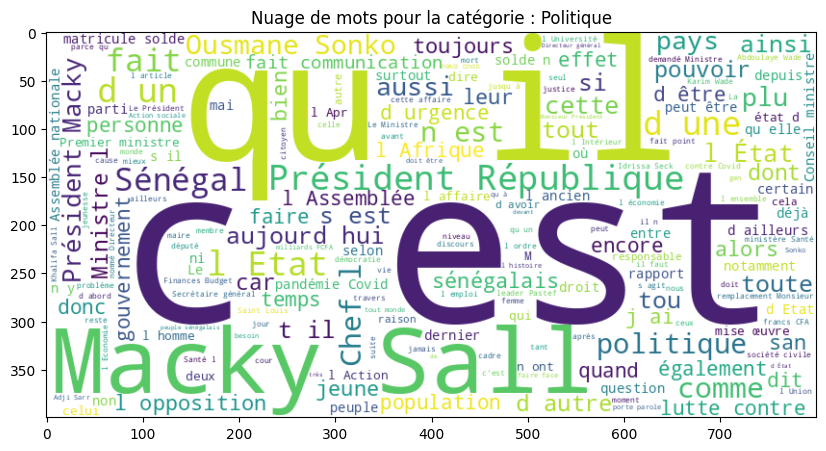

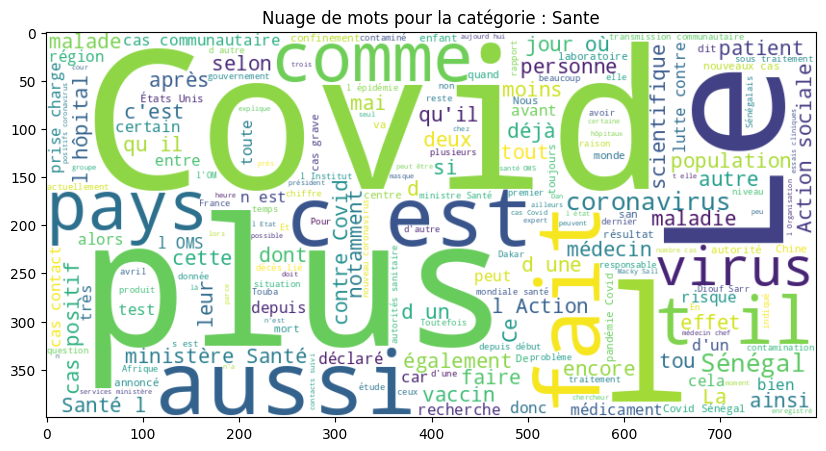

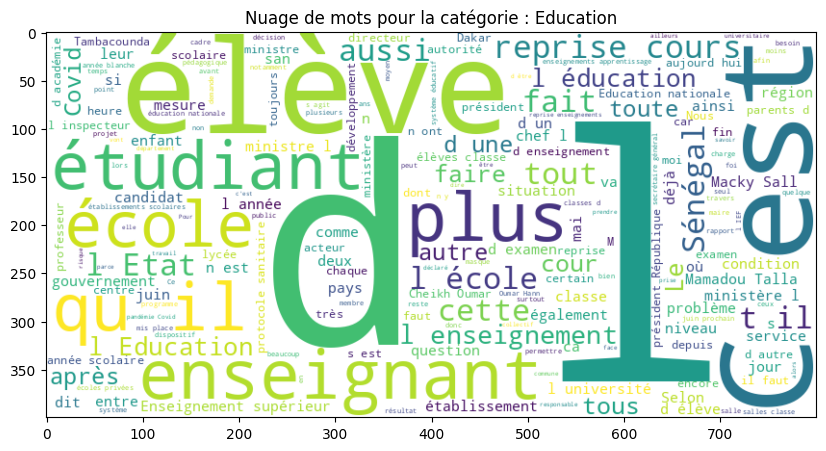

In [ ]:
# Identifier les mots fréquents par catégorie et générer des nuages de mots
for category in articles['thematiqueArticle'].unique():
    subset = articles[articles['thematiqueArticle'] == category]
    all_words = ' '.join(subset['contenuArticle'].astype(str))

    # Filtrer les mots vides
    filtered_words = ' '.join(word for word in all_words.split() if word.lower() not in stop_words)

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Nuage de mots pour la catégorie : {category}')
    plt.show()

### 1.4. Distribution des longueurs des articles

In [ ]:
# Ajouter une colonne pour la longueur des articles en termes de mots
articles['WordCount'] = articles['contenuArticle'].apply(lambda x: len(str(x).split()))
articles['CharCount'] = articles['contenuArticle'].apply(lambda x: len(str(x)))

En termes de mots

In [ ]:
# Tracer une boîte à moustaches avec Plotly Express directement
fig = px.box(
    articles,
    x='thematiqueArticle',
    y='WordCount',
    color='thematiqueArticle',  # Couleurs distinctes pour chaque catégorie
    title='Distribution des longueurs des articles (Nombre de mots)',
    labels={'thematiqueArticle': 'Catégories', 'WordCount': 'Nombre de mots'},
    template='plotly'
)

# Ajuster les options de mise en page
fig.update_layout(
    xaxis=dict(tickangle=45),  # Pivoter les étiquettes des catégories
    margin=dict(l=20, r=20, t=40, b=40),
    showlegend=False  # Masquer la légende si elle n'est pas nécessaire
)

# Afficher le graphique interactif
fig.show()

En termes de caractères

In [ ]:
# Tracer une boîte à moustaches avec Plotly Express directement
fig = px.box(
    articles,
    x='thematiqueArticle',
    y='CharCount',
    color='thematiqueArticle',  # Couleurs distinctes pour chaque catégorie
    title='Distribution des longueurs des articles (Nombre de mots)',
    labels={'thematiqueArticle': 'Catégories', 'WordCount': 'Nombre de mots'},
    template='plotly'
)

# Ajuster les options de mise en page
fig.update_layout(
    xaxis=dict(tickangle=45),  # Pivoter les étiquettes des catégories
    margin=dict(l=20, r=20, t=40, b=40),
    showlegend=False  # Masquer la légende si elle n'est pas nécessaire
)

# Afficher le graphique interactif
fig.show()

## 2. Pré-traitement des données

### 2.1. Suppression des colonnes non importantes du dataset

In [ ]:
articles = articles.drop(columns=['identifiantArticle'])
articles.head()

,contenuArticle,thematiqueArticle,WordCount,CharCount
0,Après l’accalmie de ces derniers jours avec la...,Politique,460,2911
1,SENTV.info : L’attribution des marchés des den...,Politique,354,2197
3,Issa Sall nommé (depuis des mois) ministre con...,Politique,55,341
4,Les Vaccins chinois surs et efficaces Les vacc...,Sante,329,2175
8,Réaction des Patriotes de Touba La coordinatio...,Politique,419,2596


### 2.2. Gestion des valeurs manquantes

In [ ]:
# Remplir les valeurs manquantes

articles['contenuArticle'].fillna('Vide')


,contenuArticle
0,Après l’accalmie de ces derniers jours avec la...
1,SENTV.info : L’attribution des marchés des den...
3,Issa Sall nommé (depuis des mois) ministre con...
4,Les Vaccins chinois surs et efficaces Les vacc...
8,Réaction des Patriotes de Touba La coordinatio...
...,...
7832,De Diouf à Macky : L’éternel défi de l’emploi ...
7833,"Bachirou Ba, collectif Aar sunu momel Le coord..."
7834,Report des Elections locales Le report des éle...
7836,"Covid-19 : 5 décès, 52 nouveaux tests positifs..."


### 2.3. Importation et configuration de spacy

In [ ]:
!pip install spacy

Importation de spacy

In [ ]:
import spacy

In [ ]:
!python -m spacy download fr_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 26.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Importation du module de langue française de spacy

In [ ]:
nlp = spacy.load("fr_core_news_sm")

### 2.4. Tokenisation et Lemmatisation

> Ajouter une citation




In [ ]:
# Importation de la liste des mots vides (stop words) pour la langue française dans spaCy
stop_words = spacy.lang.fr.stop_words.STOP_WORDS

# Définition d'une fonction qui vérifie si un mot donné appartient à une liste de mots vides
def is_stop_word(word, stop_list):
    return str(word).lower() in stop_list

Tokenisation

In [ ]:
import re  # Importation du module pour travailler avec les expressions régulières

# Fonction pour tokeniser un texte
def tokenize(text):
    # Conversion du texte en chaîne de caractères, suppression des espaces inutiles, et passage en minuscules
    text = str(text).strip().lower()

    # Traitement du texte avec un pipeline NLP (défini en tant que `nlp`)
    doc = nlp(text)

    # Création d'une liste de tokens filtrés
    token_list = [
        word.text  # Récupération du texte brut de chaque token
        for word in doc
        if not is_stop_word(word.text, stop_words)  # Exclusion des mots vides
        and not word.is_punct  # Exclusion des signes de ponctuation
        and word.text.isalpha()  # Garde uniquement les mots composés de lettres alphabétiques
    ]

    # Retourne la liste de tokens filtrés
    return token_list

In [ ]:
# Ajout d'une colonne 'Tokens' dans le DataFrame 'articles'
articles['Tokens'] = articles['contenuArticle'].astype(str).apply(lambda x: tokenize(x))

# Affichage des colonnes 'contenuArticle' et 'Tokens' pour les premières lignes du DataFrame
articles[['contenuArticle', 'Tokens']].head()

,contenuArticle,Tokens
0,Après l’accalmie de ces derniers jours avec la...,"[accalmie, derniers, jours, libération, person..."
1,SENTV.info : L’attribution des marchés des den...,"[attribution, marchés, denrées, aide, alimenta..."
3,Issa Sall nommé (depuis des mois) ministre con...,"[issa, sall, nommé, mois, ministre, conseiller..."
4,Les Vaccins chinois surs et efficaces Les vacc...,"[vaccins, chinois, surs, efficaces, vaccins, l..."
8,Réaction des Patriotes de Touba La coordinatio...,"[réaction, patriotes, touba, coordination, com..."


Lemmatisation

In [ ]:
# Fonction pour lemmatiser un texte
def lemmatize(text):
    # Conversion du texte en chaîne de caractères, suppression des espaces inutiles, et passage en minuscules
    text = str(text).strip().lower()

    # Analyse du texte avec un pipeline NLP (défini en tant que `nlp`)
    doc = nlp(text)

    # Création d'une liste de lemmes filtrés
    lemmatized_tokens = [
        word.lemma_  # Récupération du lemme de chaque token
        for word in doc
        if not is_stop_word(word.lemma_, stop_words)  # Exclusion des lemmes qui sont des mots vides
        and not word.is_punct  # Exclusion des signes de ponctuation
        and word.text.isalpha()  # Garde uniquement les mots composés de lettres alphabétiques
    ]

    # Retourne la liste des lemmes filtrés
    return lemmatized_tokens

In [ ]:
# Ajout d'une colonne 'Lemmas' dans le DataFrame 'articles'
articles['Lemmas'] = articles['contenuArticle'].astype(str).apply(lambda x: lemmatize(x))

# Affichage des colonnes 'contenuArticle' et 'Lemmas' pour les premières lignes du DataFrame
articles[['contenuArticle', 'Lemmas']].head()

,contenuArticle,Lemmas
0,Après l’accalmie de ces derniers jours avec la...,"[accalmie, dernier, jour, libération, arrêter,..."
1,SENTV.info : L’attribution des marchés des den...,"[attribution, marché, denrée, aide, alimentair..."
3,Issa Sall nommé (depuis des mois) ministre con...,"[isser, sall, nommer, mois, ministre, conseill..."
4,Les Vaccins chinois surs et efficaces Les vacc...,"[vaccin, chinois, efficace, vaccin, laboratoir..."
8,Réaction des Patriotes de Touba La coordinatio...,"[réaction, patriote, touba, coordination, comm..."


Reconstruction du texte après traitement

In [ ]:
# Reconstruire le texte nettoyé (lemmes combinés)
articles['Cleaned_Text'] = articles['Lemmas'].apply(lambda tokens: ' '.join(tokens))

# Afficher les textes nettoyés
articles[['contenuArticle', 'Cleaned_Text']].head()

,contenuArticle,Cleaned_Text
0,Après l’accalmie de ces derniers jours avec la...,accalmie dernier jour libération arrêter émeut...
1,SENTV.info : L’attribution des marchés des den...,attribution marché denrée aide alimentaire ges...
3,Issa Sall nommé (depuis des mois) ministre con...,isser sall nommer mois ministre conseiller tri...
4,Les Vaccins chinois surs et efficaces Les vacc...,vaccin chinois efficace vaccin laboratoire chi...
8,Réaction des Patriotes de Touba La coordinatio...,réaction patriote touba coordination communal ...


## 3. Visualisation des données prétraitées

### 3.1. Distribution des mots ou expressions fréquentes par catégorie

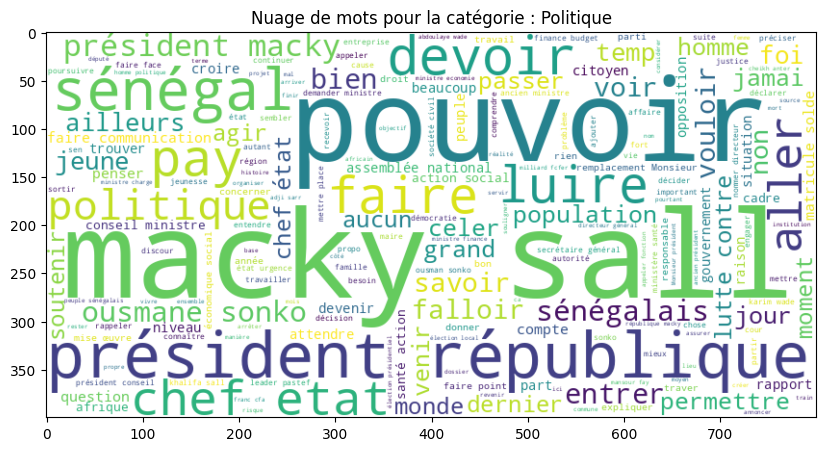

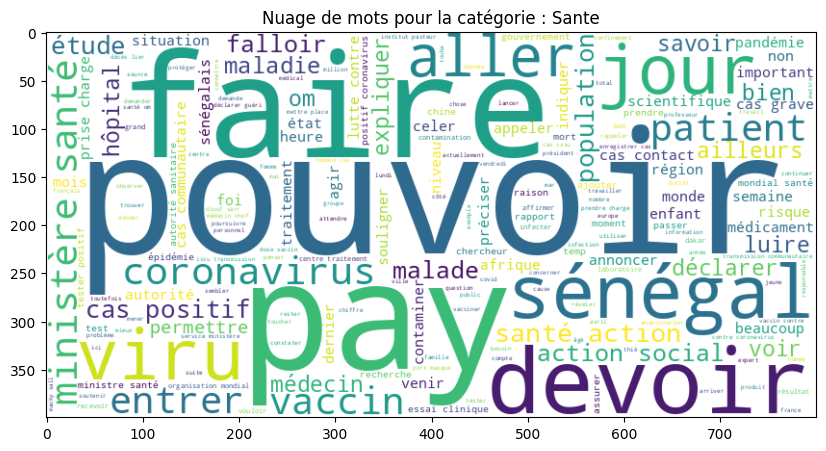

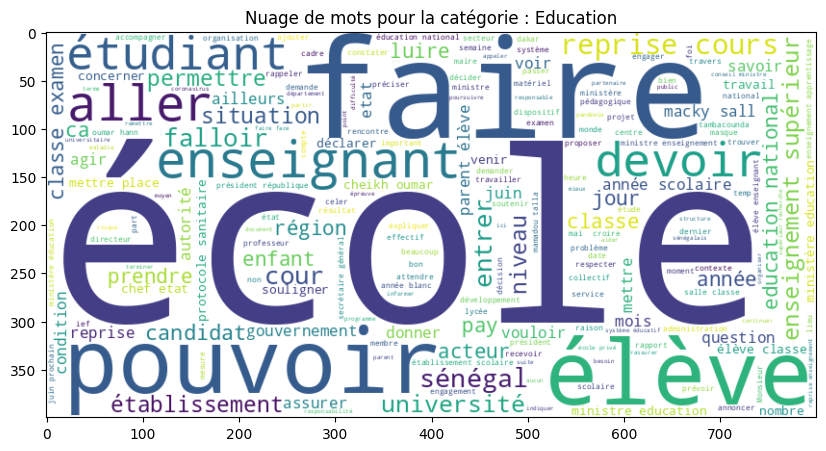

In [ ]:
# Identifier les mots fréquents par catégorie et générer des nuages de mots
for category in articles['thematiqueArticle'].unique():
    subset = articles[articles['thematiqueArticle'] == category]
    all_words = ' '.join(subset['Cleaned_Text'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Nuage de mots pour la catégorie : {category}')
    plt.show()

### 3.2. Distribution des longueurs des articles

In [ ]:
# Ajouter une colonne pour la longueur des articles en termes de mots
articles['WordCount'] = articles['Cleaned_Text'].apply(lambda x: len(str(x).split()))
articles['CharCount'] = articles['Cleaned_Text'].apply(lambda x: len(str(x)))

En termes de mots

In [ ]:
# Tracer une boîte à moustaches avec Plotly Express directement
fig = px.box(
    articles,
    x='thematiqueArticle',
    y='WordCount',
    color='thematiqueArticle',  # Couleurs distinctes pour chaque catégorie
    title='Distribution des longueurs des articles (Nombre de mots)',
    labels={'thematiqueArticle': 'Catégories', 'WordCount': 'Nombre de mots'},
    template='plotly'
)

# Ajuster les options de mise en page
fig.update_layout(
    xaxis=dict(tickangle=45),  # Pivoter les étiquettes des catégories
    margin=dict(l=20, r=20, t=40, b=40),
    showlegend=False  # Masquer la légende si elle n'est pas nécessaire
)

# Afficher le graphique interactif
fig.show()

En termes de caractères

In [ ]:
# Tracer une boîte à moustaches avec Plotly Express directement
fig = px.box(
    articles,
    x='thematiqueArticle',
    y='CharCount',
    color='thematiqueArticle',  # Couleurs distinctes pour chaque catégorie
    title='Distribution des longueurs des articles (Nombre de mots)',
    labels={'thematiqueArticle': 'Catégories', 'WordCount': 'Nombre de mots'},
    template='plotly'
)

# Ajuster les options de mise en page
fig.update_layout(
    xaxis=dict(tickangle=45),  # Pivoter les étiquettes des catégories
    margin=dict(l=20, r=20, t=40, b=40),
    showlegend=False  # Masquer la légende si elle n'est pas nécessaire
)

# Afficher le graphique interactif
fig.show()

## 2. Prétraitement-Bis

Mappage des thématiques en valeurs numériques

In [ ]:
# Définir un dictionnaire de mappage pour convertir les thématiques textuelles en valeurs numériques
class_map = {
    'Politique': 0,  # La thématique "Politique" est associée à la classe 0
    'Sante': 1,      # La thématique "Sante" est associée à la classe 1
    'Education': 2   # La thématique "Education" est associée à la classe 3
}

# Appliquer une transformation sur la colonne "thematiqueArticle" du DataFrame articles
# La méthode apply() parcourt chaque valeur de cette colonne et remplace
# chaque étiquette textuelle par sa valeur numérique correspondante dans class_map
articles["thematiqueArticle"] = articles["thematiqueArticle"].apply(lambda x: class_map[x])

# Afficher les premières lignes du DataFrame pour vérifier le résultat
articles.head()

,contenuArticle,thematiqueArticle,WordCount,CharCount,Tokens,Lemmas,Cleaned_Text
0,Après l’accalmie de ces derniers jours avec la...,0,224,1871,"[accalmie, derniers, jours, libération, person...","[accalmie, dernier, jour, libération, arrêter,...",accalmie dernier jour libération arrêter émeut...
1,SENTV.info : L’attribution des marchés des den...,0,153,1288,"[attribution, marchés, denrées, aide, alimenta...","[attribution, marché, denrée, aide, alimentair...",attribution marché denrée aide alimentaire ges...
3,Issa Sall nommé (depuis des mois) ministre con...,0,35,250,"[issa, sall, nommé, mois, ministre, conseiller...","[isser, sall, nommer, mois, ministre, conseill...",isser sall nommer mois ministre conseiller tri...
4,Les Vaccins chinois surs et efficaces Les vacc...,1,151,1253,"[vaccins, chinois, surs, efficaces, vaccins, l...","[vaccin, chinois, efficace, vaccin, laboratoir...",vaccin chinois efficace vaccin laboratoire chi...
8,Réaction des Patriotes de Touba La coordinatio...,0,214,1667,"[réaction, patriotes, touba, coordination, com...","[réaction, patriote, touba, coordination, comm...",réaction patriote touba coordination communal ...


## 4. Représentation des textes

In [ ]:
# Importation de la fonction nécessaire pour diviser les données
from sklearn.model_selection import train_test_split

In [ ]:
# Division du jeu de données en ensembles d'entraînement et de test
# - articles['Cleaned_Text'] : Colonne contenant les textes nettoyés des articles, utilisée comme variable indépendante (X).
# - articles['thematiqueArticle'] : Colonne contenant les thématiques des articles, utilisée comme variable cible (y).
x_train, x_test, y_train, y_test = train_test_split(
    articles['Cleaned_Text'],        # Données d'entrée (features) à diviser
    articles['thematiqueArticle'],  # Étiquettes ou cibles associées aux données
    train_size=0.7,                 # Proportion des données utilisées pour l'ensemble d'entraînement (70 % ici)
    random_state=0,                 # Graine aléatoire pour garantir la reproductibilité de la division
    shuffle=True,                   # Indique que les données doivent être mélangées avant la division
    stratify=None                   # Aucune stratification sur la variable cible n'est appliquée (répartition uniforme par défaut)
)


In [ ]:
print("Données d'entrainement : ", x_train.shape[0])
print("Données de test : ", x_test.shape[0])

Données d'entrainement :  3729
Données de test :  1599


In [ ]:
# Importation des classes nécessaires pour la vectorisation des données textuelles
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [ ]:
# Initialisation d'un CountVectorizer
# CountVectorizer convertit un corpus de texte en une matrice de fréquence des mots.
# Chaque élément de la matrice représente le nombre d'occurrences d'un mot dans un document.
tf_vect = CountVectorizer()

# Initialisation d'un TfidfVectorizer
# TfidfVectorizer convertit un corpus de texte en une matrice de scores TF-IDF (Term Frequency-Inverse Document Frequency).
# Ce score mesure la fréquence d'un mot dans un document (TF) et réduit son importance si le mot est fréquent dans plusieurs documents (IDF).
tfidf_vect = TfidfVectorizer()

In [ ]:
# Transformation des données d'entraînement en représentation numérique basée sur les fréquences de mots
# - La méthode fit_transform() apprend le vocabulaire du texte (en s'adaptant aux données d'entraînement)
#   et transforme les données textuelles en une matrice de fréquences des mots.
text_tf = tf_vect.fit_transform(x_train)

# Transformation des données d'entraînement en représentation numérique basée sur les scores TF-IDF
# - La méthode fit_transform() apprend le vocabulaire et les pondérations TF-IDF à partir des données d'entraînement,
#   puis transforme les données textuelles en une matrice de scores TF-IDF.
text_tfidf = tfidf_vect.fit_transform(x_train)


In [ ]:
# Récupération des termes (caractéristiques) du vocabulaire appris par le CountVectorizer
# - La méthode get_feature_names_out() fonctionne de manière similaire pour le CountVectorizer,
#   renvoyant tous les mots uniques identifiés lors de l'entraînement.
terms_tf = tf_vect.get_feature_names_out()

# Récupération des termes (caractéristiques) du vocabulaire appris par le TfidfVectorizer
# - La méthode get_feature_names_out() renvoie une liste de tous les termes uniques (caractéristiques) identifiés
#   lors de l'entraînement du TfidfVectorizer sur le jeu de données.
terms_tfidf = tfidf_vect.get_feature_names_out()


In [ ]:
# Conversion de la matrice sparse (fréquences de mots) en un DataFrame pandas
# - text_tf : Matrice sparse générée par CountVectorizer, convertie en tableau dense avec toarray().
# - columns=terms_tf : Les colonnes du DataFrame sont nommées d'après les termes uniques (vocabulaire) appris par CountVectorizer.
df_tf = pd.DataFrame(text_tf.toarray(), columns=terms_tf)

# Affichage du DataFrame résultant
df_tf.head()


,aa,aar,aautour,aawo,ab,aba,ababacar,ababcar,abaisse,abandon,...,ñu,ôte,ôter,œil,œuf,œuvre,œuvrent,œuvrer,œuvron,ʺla
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Conversion de la matrice sparse (scores TF-IDF) en un DataFrame pandas
# - text_tfidf : Matrice sparse générée par TfidfVectorizer, convertie en tableau dense avec toarray().
# - columns=terms_tfidf : Les colonnes du DataFrame sont nommées d'après les termes uniques (vocabulaire) appris par TfidfVectorizer.
df_tfidf = pd.DataFrame(text_tfidf.toarray(), columns=terms_tfidf)

# Affichage du DataFrame résultant
df_tfidf.head()


,aa,aar,aautour,aawo,ab,aba,ababacar,ababcar,abaisse,abandon,...,ñu,ôte,ôter,œil,œuf,œuvre,œuvrent,œuvrer,œuvron,ʺla
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.032262,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058384,...,0.0,0.0,0.0,0.000000,0.0,0.030286,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.042384,0.0,0.0,0.0,0.0


In [ ]:
# Assignation du DataFrame des scores TF-IDF à une nouvelle variable
# - df_train : Nouveau nom pour le DataFrame contenant les scores TF-IDF, afin de le désigner comme l'ensemble de données d'entraînement.
df_train = df_tfidf

In [ ]:
# Transformation des données de test en une représentation numérique basée sur les scores TF-IDF
# - tfidf_vect : L'instance de TfidfVectorizer déjà ajustée sur les données d'entraînement.
# - transform(x_test) : Applique la transformation TF-IDF aux données de test (x_test) en utilisant le vocabulaire et les pondérations TF-IDF appris lors de l'entraînement.
x_test = tfidf_vect.transform(x_test)

# Affichage de la matrice sparse résultante
x_test

<1599x28305 sparse matrix of type '<class 'numpy.float64'>'
	with 240680 stored elements in Compressed Sparse Row format>

In [ ]:
# Récupération des termes (caractéristiques) du vocabulaire appris par TfidfVectorizer
# - tfidf_vect.get_feature_names_out() renvoie la liste des termes uniques présents dans le vocabulaire appris.
terms = tfidf_vect.get_feature_names_out()

# Conversion de la matrice sparse (scores TF-IDF pour les données de test) en un DataFrame pandas
# - x_test.toarray() convertit la matrice sparse des scores TF-IDF en un tableau dense.
# - columns=terms : Les colonnes du DataFrame sont nommées d'après les termes uniques appris par le TfidfVectorizer.
df_test = pd.DataFrame(x_test.toarray(), columns=terms)

df_test.head()


,aa,aar,aautour,aawo,ab,aba,ababacar,ababcar,abaisse,abandon,...,ñu,ôte,ôter,œil,œuf,œuvre,œuvrent,œuvrer,œuvron,ʺla
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 5. Modélisation et évaluation



> Nous abons decidé de séparer le modèle SVM des autres modèles car il nécessite beaucoup de temps d'éxecution et de ressources



### 5.1. Importation des modules nécessaires

In [ ]:
# Importation du classifieur basé sur les forêts aléatoires
from sklearn.ensemble import RandomForestClassifier
# RandomForestClassifier est un algorithme d'ensemble qui combine plusieurs arbres de décision.
# Il est utilisé pour des tâches de classification ou de régression.
# Avantages : robuste au surapprentissage, gère bien les données bruitées et les données avec des variables catégoriques.

# Importation de la machine à vecteurs de support (SVM - Support Vector Machine)
from sklearn.svm import SVC  # SVC signifie "Support Vector Classifier"
# SVM est un algorithme supervisé utilisé pour la classification ou la régression.
# Il est particulièrement utile pour des données de faible dimension ou des données non linéaires grâce à ses noyaux (kernels).
# Le noyau 'linear', par exemple, permet de tracer une hyperplane linéaire de séparation.

# Importation du classifieur Naive Bayes multinomial
from sklearn.naive_bayes import MultinomialNB
# MultinomialNB est une variante de Naive Bayes qui est particulièrement adaptée aux données discrètes.
# Exemple d'application : classification de texte (analyse de sentiments, catégorisation d'articles).
# Hypothèse clé : suppose que les variables sont conditionnellement indépendantes.

# Importation de la régression logistique
from sklearn.linear_model import LogisticRegression
# LogisticRegression est un modèle supervisé utilisé principalement pour des tâches de classification binaire ou multinomiale.
# Exemple d'application : classification d'images, prédiction d'appartenance à une classe.
# Le paramètre `multi_class='multinomial'` permet de gérer des tâches de classification à plusieurs classes.

# Importation des outils pour l'évaluation de modèles et la validation croisée
# - learning_curve : Utilisé pour générer une courbe d'apprentissage.
#    - Permet de visualiser comment la performance d'un modèle évolue en fonction de la taille des données d'entraînement.
#    - Aide à diagnostiquer des problèmes comme le surapprentissage (overfitting) ou le sous-apprentissage (underfitting).
# - StratifiedKFold : Divise les données en sous-échantillons pour la validation croisée tout en respectant la répartition des classes cibles.
from sklearn.model_selection import learning_curve, StratifiedKFold

# Importation de la fonction `compute_class_weight` :
# - `compute_class_weight` est une fonction de la bibliothèque scikit-learn utilisée pour calculer les poids des classes.
# - Ces poids peuvent être utilisés pour gérer les problèmes de déséquilibre dans les classes cibles lors de l'entraînement d'un modèle.
from sklearn.utils.class_weight import compute_class_weight

### 5.2. Gestion du désequilibre des classes



> Suréchantillonnage des observations minoritaires



In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE

# Équilibrage des classes avec SMOTE
smote = SMOTE(random_state=42)
df_train_balanced, y_train_balanced = smote.fit_resample(df_train, y_train)

In [ ]:
df_train_balanced.shape[0]



> Calcul des poids des classes



In [ ]:
# Calcul des poids des classes pour un ensemble de données déséquilibré :
# - `class_weight='balanced'` : Demande à scikit-learn de calculer automatiquement les poids des classes en fonction de leur fréquence dans les données.
#   La formule utilisée est :
#       poids_classe = (nombre_total_échantillons) / (nombre_de_classes * nombre_échantillons_dans_la_classe)
# - `classes=np.unique(y_train)` : Spécifie les classes présentes dans `y_train`. Cela garantit que les classes sont correctement identifiées.
# - `y=y_train` : Fournit les étiquettes cibles de l'ensemble d'entraînement pour calculer les poids basés sur la distribution réelle des classes.

classes_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)

# Conversion des poids calculés en un dictionnaire :
# - `enumerate(classes_weights)` : Associe chaque poids à une classe via un index.
# - La structure résultante est un dictionnaire où :
#   - Les clés représentent les indices des classes (par exemple : 0, 1, 2...).
#   - Les valeurs sont les poids correspondants calculés pour ces classes.

class_weight_dict = dict(enumerate(classes_weights))

# Affichage ou utilisation des poids calculés :
# - `class_weight_dict` peut être utilisé pour paramétrer un modèle scikit-learn qui accepte des poids de classes,
#   comme `RandomForestClassifier`, `LogisticRegression`, etc.
# - Cela aide le modèle à accorder plus d'importance aux classes minoritaires pendant l'entraînement.

class_weight_dict

{0: 0.5224884405212274, 1: 1.1435142594296228, 2: 4.726235741444867}

### 5.3. Initialisation des modèles



> Initialisation des modèles : RandomForest, LogisticRegression et ultinomialNB



In [ ]:
# Définir une liste de modèles pour l'évaluation
# - La clé est le nom du modèle (sous forme de chaîne de caractères).
# - La valeur est une instance du modèle correspondant initialisée avec ses hyperparamètres par défaut.
models = {
    'Random Forest': RandomForestClassifier(class_weight=class_weight_dict),  # Classifieur basé sur des forêts d'arbres de décision.
    'Multinomial Naive Bayes': MultinomialNB(),  # Naive Bayes multinomial pour les données catégoriques.
    'Multinomial Logistic Regression': LogisticRegression(
        multi_class='multinomial', solver='lbfgs', class_weight=class_weight_dict # Régression logistique multinomiale avec le solveur lbfgs.
    )
}




> Initialisation du modèle SVM



In [ ]:
modelSVM = SVC(kernel='linear', random_state=0, class_weight=class_weight_dict)  # Machine à vecteurs de support avec noyau linéaire.




> Configuration de la validation croisée avec stratification




In [ ]:
# Configuration de la validation croisée avec stratification
# - StratifiedKFold : Divise les données en `n_splits` sous-échantillons tout en maintenant les proportions des classes cibles.
# - shuffle=True : Mélange les données avant de les diviser en plis pour une meilleure distribution.
# - random_state=0 : Fixe la graine aléatoire pour obtenir des résultats reproductibles.
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

### 5.4. Validation croisée



> Importation des métriques et de la fonction de validation croisée



In [ ]:
from sklearn.model_selection import cross_val_score

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report



> Validation croisée pour les Modèles : RandomForest, LogisticRegression et MultinomialNB



> Utilisation du score F1 moyen pour cette partie



In [ ]:
# Validation croisée
for nom, model in models.items():
    scores = cross_val_score(model, df_train, y_train, cv=5, scoring='f1_weighted')
    print(f"\nRésultats de validation croisée pour {nom}:")
    print(f"Score F1 moyen: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")


Résultats de validation croisée pour Random Forest:
Score F1 moyen: 0.926 (+/- 0.022)

Résultats de validation croisée pour Multinomial Naive Bayes:
Score F1 moyen: 0.766 (+/- 0.015)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will 


Résultats de validation croisée pour Multinomial Logistic Regression:
Score F1 moyen: 0.932 (+/- 0.016)




> Validation croisée pour le modèle SVM





> Utilisation du score F1 moyen pour cette partie



In [ ]:
# Validation croisée SVM
scoresSVM = cross_val_score(modelSVM, df_train, y_train, cv=5, scoring='f1_weighted')
print(f"\nRésultats de validation croisée pour SVM:")
print(f"Score F1 moyen: {scoresSVM.mean():.3f} (+/- {scoresSVM.std() * 2:.3f})")


Résultats de validation croisée pour SVM:
Score F1 moyen: 0.940 (+/- 0.014)


### 5.4. Validation croisée Bis

Validation croisée compléte sur les modèles : RandomForest, LogisticRegression et MultinomialNB

In [ ]:
for nom, model in models.items():
    fold_scores = []
    print(f"\nValidation croisée pour {nom}:")

    for fold, (train_idx, val_idx) in enumerate(cv.split(df_train, y_train)):
        # Séparation des données pour le fold courant
        X_fold_train = df_train.iloc[train_idx]
        y_fold_train = y_train.iloc[train_idx]
        X_fold_val = df_train.iloc[val_idx]
        y_fold_val = y_train.iloc[val_idx]

        # Entraînement du modèle sur les données de train
        model.fit(X_fold_train, y_fold_train)

        # Prédictions sur les données de validation
        y_fold_pred = model.predict(X_fold_val)

        # Calcul du score F1
        score = f1_score(y_fold_val, y_fold_pred, average='weighted')
        fold_scores.append(score)
        print(f"Fold {fold+1}: {score:.3f}")

    # Affichage des scores moyens et de l'écart-type
    print(f"Score moyen: {np.mean(fold_scores):.3f} (+/- {np.std(fold_scores)*2:.3f})")


Validation croisée pour Random Forest:
Fold 1: 0.917
Fold 2: 0.917
Fold 3: 0.919
Score moyen: 0.918 (+/- 0.002)

Validation croisée pour Multinomial Naive Bayes:
Fold 1: 0.761
Fold 2: 0.749
Fold 3: 0.747
Score moyen: 0.752 (+/- 0.012)

Validation croisée pour Multinomial Logistic Regression:


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.



Fold 1: 0.919


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.



Fold 2: 0.931


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.



Fold 3: 0.937
Score moyen: 0.929 (+/- 0.015)


Validation croisée compléte sur le modèle SVM

In [ ]:
fold_scoresSVM = []
print(f"\nValidation croisée pour SVM:")

for fold, (train_idx, val_idx) in enumerate(cv.split(df_train, y_train)):
    # Séparation des données pour le fold courant
    X_fold_train = df_train.iloc[train_idx]
    y_fold_train = y_train.iloc[train_idx]
    X_fold_val = df_train.iloc[val_idx]
    y_fold_val = y_train.iloc[val_idx]

    # Entraînement du modèle sur les données de train
    modelSVM.fit(X_fold_train, y_fold_train)

    # Prédictions sur les données de validation
    y_fold_pred = modelSVM.predict(X_fold_val)

    # Calcul du score F1
    scoreSVM = f1_score(y_fold_val, y_fold_pred, average='weighted')
    fold_scoresSVM.append(scoreSVM)
    print(f"Fold {fold+1}: {scoreSVM:.3f}")

# Affichage des scores moyens et de l'écart-type
print(f"Score moyen: {np.mean(fold_scoresSVM):.3f} (+/- {np.std(fold_scoresSVM)*2:.3f})")


Validation croisée pour SVM:
Fold 1: 0.924
Fold 2: 0.941
Fold 3: 0.937
Score moyen: 0.934 (+/- 0.014)


### 5.5. Evaluation des modèles

Evaluation des modèles : RandomForest, LogisticRegression et MultinomialNB

In [ ]:
# Évaluation des modèles
results = {}
for nom, model in models.items():
    y_pred = model.predict(df_test)

    results[nom] = {
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'rappel': recall_score(y_test, y_pred, average='weighted'),
        'f1': f1_score(y_test, y_pred, average='weighted')
    }

    print(f"\nRésultats pour {nom}:")
    print(classification_report(y_test, y_pred))

results = pd.DataFrame(results).T


Résultats pour Random Forest:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1044
           1       0.92      0.88      0.90       432
           2       0.97      0.58      0.72       123

    accuracy                           0.91      1599
   macro avg       0.93      0.81      0.85      1599
weighted avg       0.92      0.91      0.91      1599



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.




Résultats pour Multinomial Naive Bayes:
              precision    recall  f1-score   support

           0       0.76      0.95      0.85      1044
           1       0.84      0.57      0.68       432
           2       0.00      0.00      0.00       123

    accuracy                           0.78      1599
   macro avg       0.53      0.51      0.51      1599
weighted avg       0.72      0.78      0.74      1599


Résultats pour Multinomial Logistic Regression:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1044
           1       0.84      0.90      0.87       432
           2       0.91      0.89      0.90       123

    accuracy                           0.91      1599
   macro avg       0.90      0.90      0.90      1599
weighted avg       0.92      0.91      0.91      1599



Evaluation du modèle SVM

In [ ]:
# Évaluation des modèles
resultsSVM = {}
y_pred = modelSVM.predict(df_test)

resultsSVM['SVM'] = {
    'precision': precision_score(y_test, y_pred, average='weighted'),
    'rappel': recall_score(y_test, y_pred, average='weighted'),
    'f1': f1_score(y_test, y_pred, average='weighted')
}

print(f"\nRésultats pour SVM:")
print(classification_report(y_test, y_pred))

resultsSVM = pd.DataFrame(resultsSVM).T


Résultats pour SVM:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1044
           1       0.85      0.92      0.88       432
           2       0.93      0.83      0.88       123

    accuracy                           0.92      1599
   macro avg       0.91      0.89      0.90      1599
weighted avg       0.92      0.92      0.92      1599



### 5.6. Graphiques ilustrants les résultats de l'évaluation

Modèles : RandomForest, LogisticRegression et MultinomialNB

In [ ]:
# Graphique à barres avec Plotly
fig_bar = px.bar(
    results.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score'),
    x='index',
    y='Score',
    color='Metric',
    barmode='group',
    title='Comparaison des performances du modèle SVM',
    labels={'index': 'Modèle', 'Score': 'Score'}
)
fig_bar.update_layout(xaxis=dict(title='Modèle'), yaxis=dict(title='Score'), legend_title='Métriques')
fig_bar.show()

# Heatmap avec Plotly
fig_heatmap = go.Figure(
    data=go.Heatmap(
        z=results.values,
        x=results.columns,
        y=results.index,
        colorscale='YlOrRd',
        texttemplate="%{z:.3f}",
        textfont={"size": 12}
    )
)
fig_heatmap.update_layout(
    title='Heatmap des performances du modèle SVM',
    xaxis=dict(title='Métriques'),
    yaxis=dict(title='Modèle'),
    margin=dict(l=40, r=40, t=40, b=40)
)
fig_heatmap.show()

Modèle SVM

In [ ]:
# Graphique à barres avec Plotly
fig_bar = px.bar(
    resultsSVM.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score'),
    x='index',
    y='Score',
    color='Metric',
    barmode='group',
    title='Comparaison des performances du modèle SVM',
    labels={'index': 'Modèle', 'Score': 'Score'}
)
fig_bar.update_layout(xaxis=dict(title='Modèle'), yaxis=dict(title='Score'), legend_title='Métriques')
fig_bar.show()

# Heatmap avec Plotly
fig_heatmap = go.Figure(
    data=go.Heatmap(
        z=resultsSVM.values,
        x=resultsSVM.columns,
        y=resultsSVM.index,
        colorscale='YlOrRd',
        texttemplate="%{z:.3f}",
        textfont={"size": 12}
    )
)
fig_heatmap.update_layout(
    title='Heatmap des performances du modèle SVM',
    xaxis=dict(title='Métriques'),
    yaxis=dict(title='Modèle'),
    margin=dict(l=40, r=40, t=40, b=40)
)
fig_heatmap.show()

### 5.7. Courbes d'apprentissage

Modèles : RandomForest, LogisticRegression et MultinomialNB

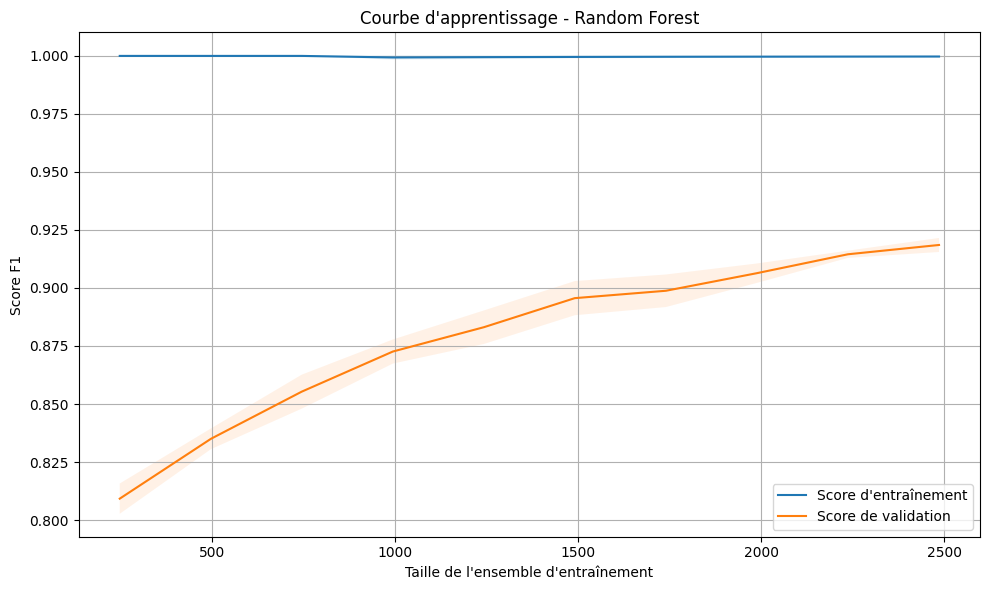

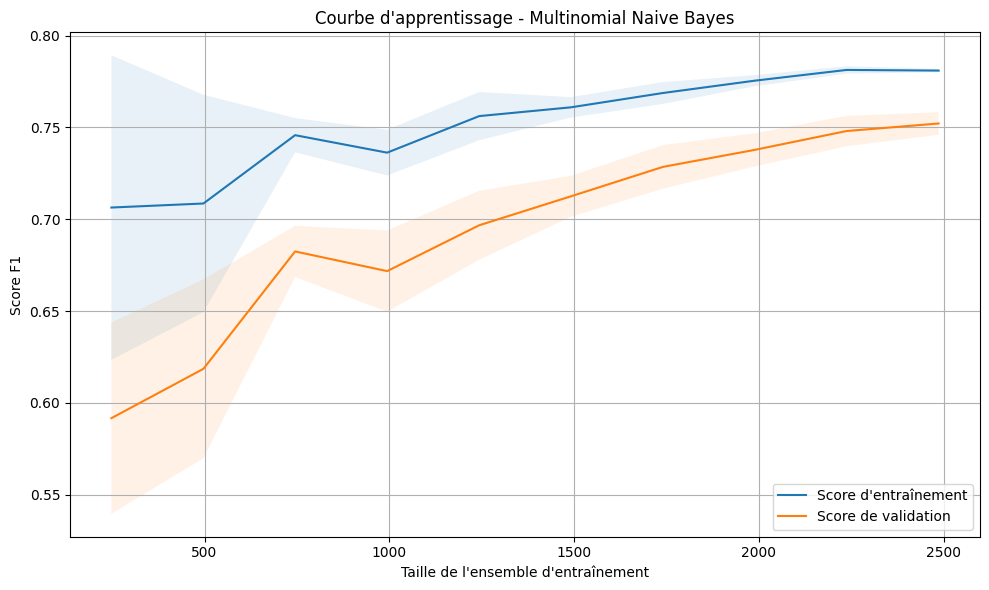

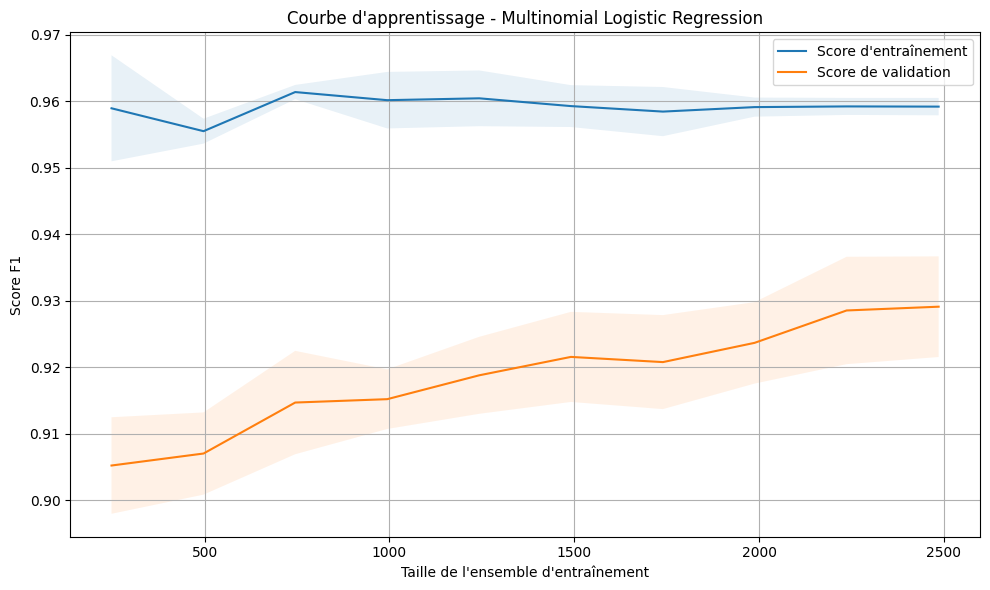

In [ ]:
# Courbes d'apprentissage pour tous les modèles
for nom, model in models.items():
    train_sizes, train_scores, test_scores = learning_curve(
        model, df_train, y_train,
        cv=cv, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='f1_weighted'
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Score d\'entraînement')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.plot(train_sizes, test_mean, label='Score de validation')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

    plt.title(f'Courbe d\'apprentissage - {nom}')
    plt.xlabel('Taille de l\'ensemble d\'entraînement')
    plt.ylabel('Score F1')
    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Modèle SVM

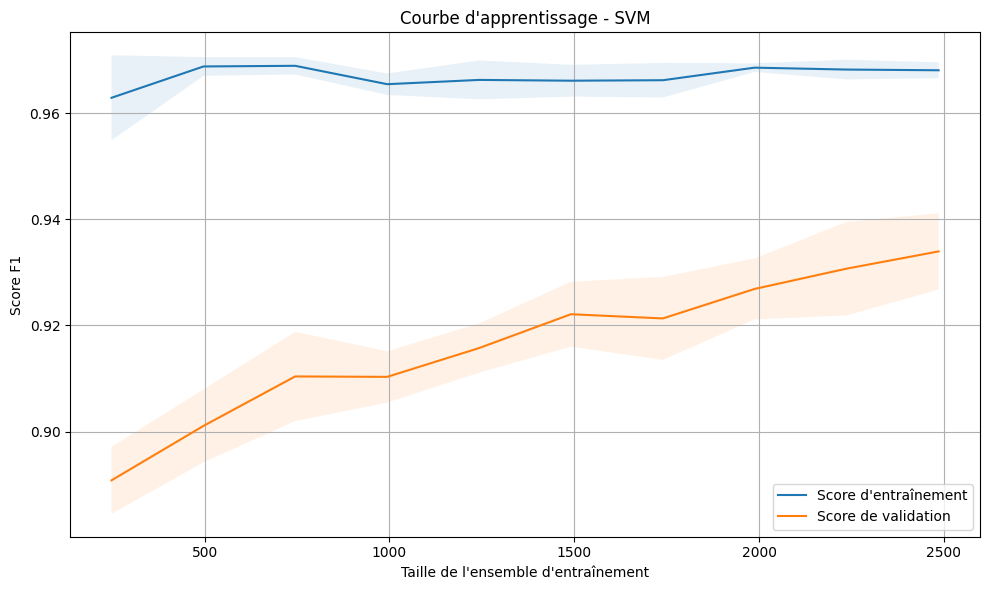

In [ ]:
# Courbes d'apprentissage pour tous les modèles
train_sizes, train_scores, test_scores = learning_curve(
    modelSVM, df_train, y_train,
    cv=cv, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='f1_weighted'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Score d\'entraînement')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label='Score de validation')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

plt.title(f'Courbe d\'apprentissage - SVM')
plt.xlabel('Taille de l\'ensemble d\'entraînement')
plt.ylabel('Score F1')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()